# PERITECTIC PHASE DIAGRAM

A peritectic phase diagram represents the following phase transformation: 
\begin{align}
Liquid + \alpha = \beta 
\end{align}
The $G_m$ curves for solid and liquid phases will be plotted along with the phase diagram using the regular solution model.

In [1]:
var('x T')
R = 8.314

In [2]:
GLA = 4173 - 15.6*T
GLB = 3250 - 16.7*T
GSA = 2860 - 15*T
GSB = 2110 - 14*T

In [3]:
eq1 = GLA==GSA
eq2 = GLB==GSB

sol1 = solve(eq1,T)
sol2 = solve(eq2,T)

N(T.subs(sol1)) , N(T.subs(sol2))

(2188.33333333333, 422.222222222222)

The large difference in melting point is a characterstic of the peritectic phase diagram

## Regular solution model

In [4]:
GL = GLA*(1-x) + GLB*(x) + R*T*(x*log(x) + (1-x)*log(1-x)) + 12000*x*(1-x)
GS = GSA*(1-x) + GSB*(x) + R*T*(x*log(x) + (1-x)*log(1-x)) + 10500*x*(1-x)

In [5]:
var('x1,x2')

(x1, x2)

## Finding common tangent(s)

In [6]:
def findCT(GS,GL,Teq,right):
    f1 = (diff(GS,x).subs(x=x1,T=Teq) - diff(GL,x).subs(x=x2,T=Teq))
    f2 = diff(GS,x).subs(x=x1,T=Teq) - ((GL.subs(x=x2,T=Teq) - GS.subs(x=x1,T=Teq))/(x2-x1))
    F = f1^2 + f2^2
    if Teq < 518 and (right ==True) :
        Sol = minimize(F,[0.99,0.999],algorithm='ncg',verbose=false)
    else:
        Sol = minimize(F,[0.1,0.9],algorithm='ncg',verbose=false)
    if (Sol[0] > 0)and (Sol[0] > 0)and (Sol[1] > 0)and (Sol[0] < 1)and(Sol[1] < 1) :
        tangent(x,T) = ( (GL.subs(x=Sol[1])-GS.subs(x=Sol[0]))/(Sol[1]-Sol[0]) )*(x-Sol[0]) + GS.subs(x=Sol[0])
        return [tangent.subs(T = Teq),Sol]

## A function to generate plots of GS and GL together with common tangents

In [7]:
def plotG(Teq):
    GL_plot = plot(GL.subs(T=Teq),(x,0,1),color='blue')
    GS_plot = plot(GS.subs(T=Teq),(x,0,1),color='black')
    tangent1 = plot(findCT(GS,GS,Teq,False)[0],(x,0,1),color = 'red',linestyle = ':')
    tangent2 = plot(findCT(GS,GL,Teq,True)[0],(x,0,1),color = 'red',linestyle = '--')
    (GL_plot+GS_plot + tangent1+tangent2).show()
    return (GL_plot+GS_plot + tangent1+tangent2)

In [8]:
from sage.repl.ipython_kernel.interact import sage_interactive

In [9]:
sage_interactive(plotG,Teq=(428,700))

## Finding the peritectic temperature
The peritectic temperature is the temperature at which there exixts a single common tangent to all minimas of $GS$ and $GL$ curves

In [10]:
for Teq in range(510,520,1):
    f1 = (diff(GS,x).subs(x=x1,T=Teq) - diff(GS,x).subs(x=x2,T=Teq))
    f2 = diff(GS,x).subs(x=x1,T=Teq) - ((GS.subs(x=x2,T=Teq) - GS.subs(x=x1,T=Teq))/(x2-x1))
    F = f1^2 + f2^2
    sol1 = minimize(F,[0.1,0.9],algorithm='ncg',verbose=false)   
    
    f4 = (diff(GL,x).subs(x=x1,T=Teq) - diff(GS,x).subs(x=x2,T=Teq))
    f5 = diff(GL,x).subs(x=x1,T=Teq) - ((GS.subs(x=x2,T=Teq) - GL.subs(x=x1,T=Teq))/(x2-x1))
    F = f4^2 + f5^2
    sol2 = minimize(F,[0.99,0.999],algorithm='ncg',verbose=false)
    
    DIF = diff(GL,x).subs(x=sol2[0],T=Teq) - diff(GS,x).subs(x=sol1[0],T=Teq)
    if abs(DIF) < 100 :
        print(DIF,'\t','Teq =',Teq,'K','\t','x =',sol2[1],'\n')

39.94324430530378 	 Teq = 512 K 	 x = 0.8504948147686784 

-13.25154973203064 	 Teq = 518 K 	 x = 0.8386598371600604 

-21.116175449542652 	 Teq = 519 K 	 x = 0.8366499689258848 



The Peritectic temperature and composition are found to be: 

In [11]:
T_per = 518
x_per = 0.8366

## To plot the Gibbs energy curves along with their representative points in a phase diagram

In [12]:
def plotGm(Teq):
    GL_plot = plot(GL.subs(T=Teq),(x,0,1),color='blue')
    GS_plot = plot(GS.subs(T=Teq),(x,0,1),color='black')
    
    CT_one = findCT(GS,GS,Teq,False)
    CT_two = findCT(GS,GL,Teq,True)
    tangent1 = plot(CT_one[0],(x,0,1),color = 'red',linestyle = '--')
    tangent2 = plot(CT_two[0],(x,0,1),color = 'red',linestyle = ':')
    plot_one = (GL_plot+GS_plot+tangent1+tangent2)
    
    Ymax = plot_one.get_axes_range()['ymax']
    Ymin = plot_one.get_axes_range()['ymin']
    
    ver_lines  = line(([CT_one[1][0],Ymax],[CT_one[1][0],Ymin]), color = 'black', linestyle = '--')
    ver_lines += line(([CT_one[1][1],Ymax],[CT_one[1][1],Ymin]), color = 'black', linestyle = '--')
    ver_lines += line(([CT_two[1][0],Ymax],[CT_two[1][0],Ymin]), color = 'black', linestyle = ':')
    ver_lines += line(([CT_two[1][1],Ymax],[CT_two[1][1],Ymin]), color = 'black', linestyle = ':')

    
    phase_points  = point([CT_two[1][1],Teq],xmin='0',xmax='1',marker='D',size=20,color='blue')
    phase_points += point([CT_two[1][0],Teq],xmin='0',xmax='1',marker='D',size=10,color='black')
    if Teq <= T_per :
        phase_points += point([CT_one[1][1],Teq],xmin='0',xmax='1',size=10,color='black')
        phase_points += point([CT_one[1][0],Teq],xmin='0',xmax='1',size=20,color='black' )  
    
    GAplot = graphics_array([ [(plot_one + ver_lines)],[phase_points] ])
    
    return GAplot

# Looking into various temperatures

## 1. Below the Peritectic temperature

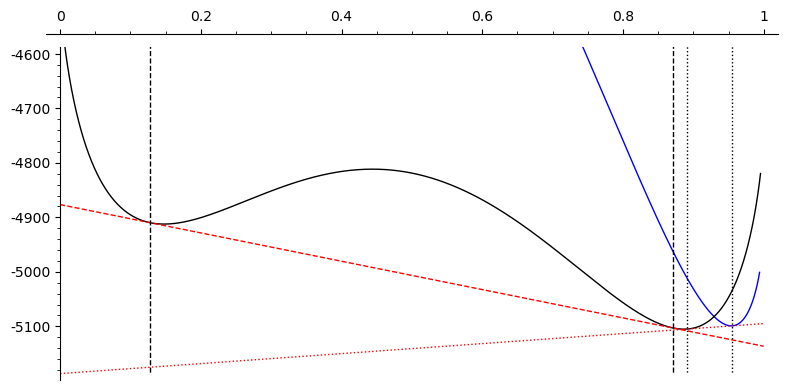

In [13]:
plotGm(490)[0].show(ymax = -4600,figsize=(8,4))

## 2. At the Peritectic temperature

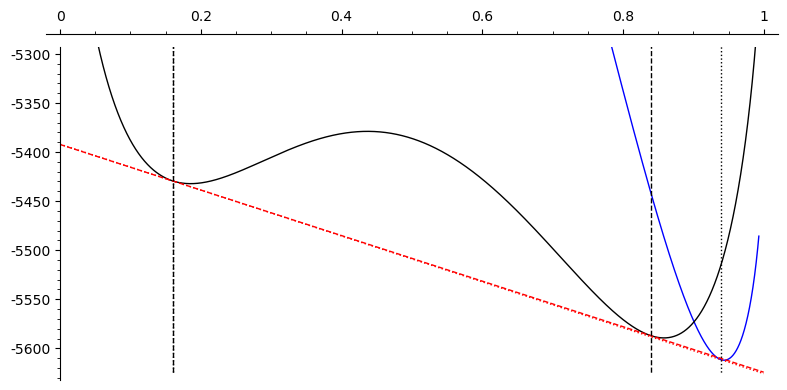

In [14]:
(plotGm(518)[0]).show(ymax = -5300,figsize=(8,4))

## 3. Above the Peritectic temperature

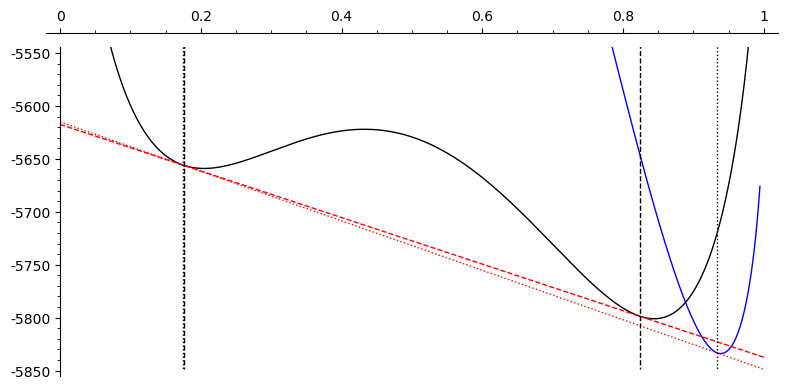

In [15]:
plotGm(530)[0].show(ymax = -5550,figsize=(8,4))

# ANIMATING
Generating an array of plots

In [16]:
PLOTS = []
PHASE_POINTS = Graphics()


PHASE_POINTS+=text("$\\alpha$+$\\beta$",[0.5,500],color='black',fontsize=10)
PHASE_POINTS+=text("$\\alpha$+$L$",[0.5,560],color='black',fontsize=10)
PHASE_POINTS+=text("$\\beta$",[0.93,455],color='black',fontsize=10)
PHASE_POINTS+=text("$L$+$\\beta$",[0.91,500],color='black',fontsize=10)
PHASE_POINTS+=text("$L$",[0.96,560],color='black',fontsize=10)
PHASE_POINTS+=text("$\\alpha$",[0.05,500],color='black',fontsize=10)

PHASE_POINTS+=line(([0,T_per],[1,T_per]),color='red',linestyle='dashdot')
PHASE_POINTS+=text("Peritectic Temperature is $518K$",[0.5,T_per-2],fontsize=10,color='black')
PHASE_POINTS+=line(([1,PHASE_POINTS.get_axes_range()['ymin']],[1,PHASE_POINTS.get_axes_range()['ymax']]), color = 'black')
PHASE_POINTS+=point(([x_per,T_per]),marker='*',size=80,color='red')

for Teq in range(450,600,5):
    Gm_graphs = plotGm(Teq)
    PHASE_POINTS+=Gm_graphs[1]
    PLOTS.append(graphics_array([[Gm_graphs[0]] ,[PHASE_POINTS] ]))

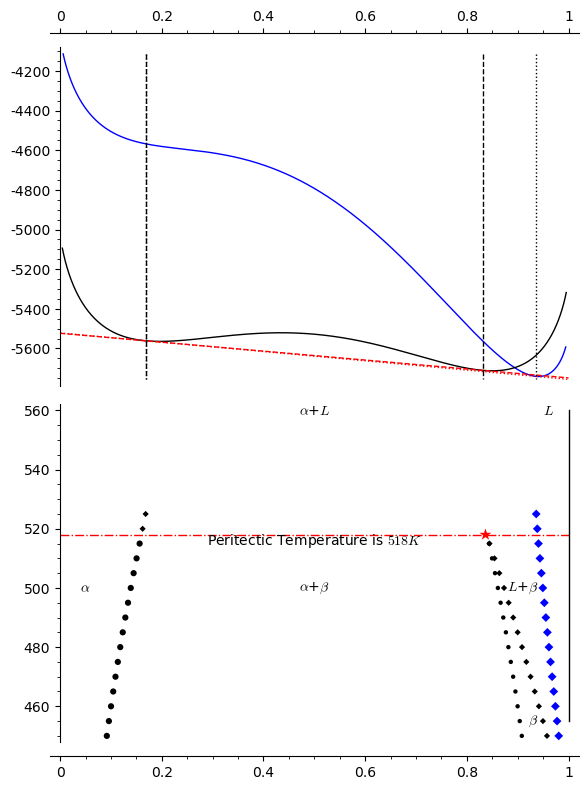

In [17]:
PLOTS[15].show(figsize=(6,8))

## Animating

In [18]:
animate_Gm = animate(PLOTS,figsize=[6,8])

Animation with 30 frames
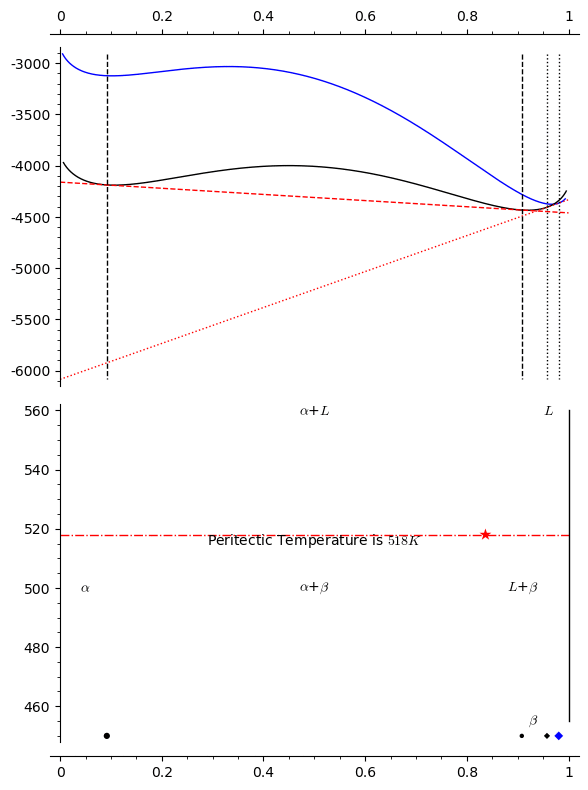

In [19]:
animate_Gm.show()

## The Phase Diagram

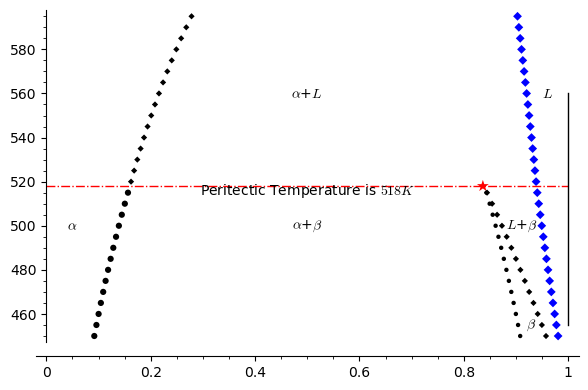

In [23]:
PLOTS[29][1].show(figsize=(6,4))